6
7.763967112989909e+39
10
8.000008979316257e+39
20
8.378896111757569e+39
30
8.670854214876714e+39
40
9.023998074498458e+39
50
9.658072088554526e+39
60
1.106454188442428e+40
70
1.4178109423784e+40
80
1.9556131313031247e+40
90
2.7256294240216437e+40
100
3.700976583071572e+40
200
1.8629895732971997e+41
300
3.443082709852232e+41
400
4.821712807434009e+41
500
6.005787652290271e+41
600
7.033266941850884e+41
700
7.933739073162607e+41
800
8.731854632985368e+41
900
9.446653626324462e+41
1000
1.0097128444848054e+42


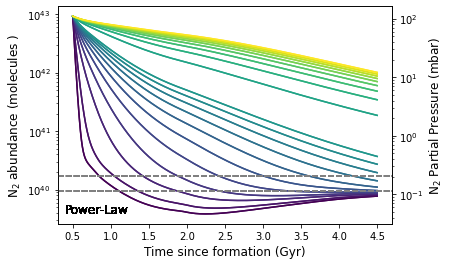

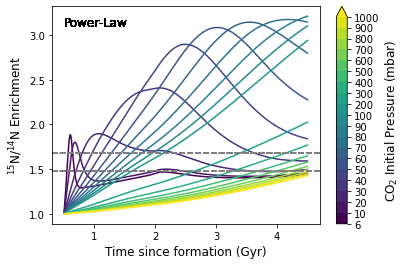

In [4]:
#Script for obtaining the nitrogen abundance and isotope enrichment plots when considering all processes at their baseline rates
#and CO2 histories varying from 6 mbar - 1 bar of initial CO2 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

time_step = 1e-3
time_step_years = 1e9 * time_step
time = np.arange(0,4.5+time_step,time_step)

def N2_initial_function(N2_initial, pressure_initial):
    
    #necessary variables for fractionation factors 
    m_delta = 1
    z_delta = 80 #km
    grav = 3.721 #m s-2
    grav_for_FF = 0.00371
    k_amu = 0.00831 #km2 amu s-2 K-1
    k_SI = 1.380649e-23 #m2 kg s-2 K-1
    surf_area = 1.4437e14  #m2
    H_N2 = 11.1  #km
    #H_CO2 = 10.18 #km
    avogadro = 6.022e23 #molecules/mol
    m_N2 = (28.014 / avogadro) / 1e3 #kg
    m_CO2 = (44.01 / avogadro) / 1e3 #kg
    scaleheight = 11.1 * 1e3 #m
    temp = 200 #K
    FF = np.exp(-(m_delta * grav_for_FF * z_delta) / (k_amu * temp))
    FF_DR = 0.58
    FF_PD = 0.29
    
    #sputtering yields
    yield_N = 3
    yield_CO2 = 0.7

    #diffusive separation factors 
    ff_28_44 = 17.4
    ff_29_44 = 14.6
    
    #power-law model of CO2 
    CO2_current_pressure = 6 #mbar 
    CO2_initial_pressure = pressure_initial #mbar 
    
    CO2_initial_molecules = (pressure_initial * 100 * surf_area) / (m_CO2 * grav)
    
    power = (np.log(CO2_initial_pressure / CO2_current_pressure)) / (np.log(time[700] / time[-1]))
    base = CO2_initial_pressure / (time[700])**power

    #initial N2 parameters 
    N15_percent_1 = []
    N15_percentage_prev_1 = 0.003663004     
    N15_percent_1.append(N15_percentage_prev_1)
    
    N14_percent_1 = []
    N14_percentage_prev_1 = 0.996336996  
    N14_percent_1.append(N14_percentage_prev_1)
    
    N15 = N2_initial * 2 * N15_percentage_prev_1
    N14 = N2_initial * 2 * N14_percentage_prev_1

    N15_14_Terrestrial = N15 / N14 
    N29 = N15
    N28 = (N14 - N15)/2.
    
    CO2_1 = []
    CO2_prev_1 = CO2_initial_molecules
    CO2_1.append(CO2_prev_1) 
    
    N2_28_1 = []
    N2_28_prev_1 = N28
    N2_28_1.append(N2_28_prev_1)

    N2_29_1 = []
    N2_29_prev_1 = N29
    N2_29_1.append(N2_29_prev_1)

    N15_1 = []
    N15_prev_1 = N15
    N15_1.append(N15_prev_1)
    
    N14_1 = []
    N14_prev_1 = N14
    N14_1.append(N14_prev_1)
    
    f_prev_1 = N15_prev_1 / N14_prev_1
    
    N2_1 = []
    N2_prev_1 = N2_28_prev_1 + N2_29_prev_1 
    N2_1.append(N2_prev_1)

    N2_pressure_1 = []
    N2_p = ((N2_prev_1 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar    
    atm_pressure_1 = []
    atm_p_1 = N2_p + CO2_initial_pressure #mbar
    atm_pressure_1.append(atm_p_1)

    CO2_molarfrac_1 = []
    N2_molarfrac_1 = []
    XCO2_1 = CO2_prev_1 / (CO2_prev_1 + N2_prev_1)
    XN2_1 = N2_prev_1 / (CO2_prev_1 + N2_prev_1)
    CO2_molarfrac_1.append(XCO2_1)
    N2_molarfrac_1.append(XN2_1)

    N2_mixing_ratio_prev_1 = N2_prev_1 / CO2_prev_1
    mixingratio_1 = []
    mixingratio_1.append(N2_mixing_ratio_prev_1)
    
    N15_mantle = 0.00354630893
    N14_mantle = 0.99645369106
    
    N15_chondrite = 0.00354630893
    N14_chondrite = 0.99645369106
    
    #impact parameters
    b_value = 0.47
    vi = 10 * 1e3 #ms-1 #impactor velocity 
    m2 = 3e19 #kg upper limit of impactor mass used by Manning pg 275
    f_ej = 0.83 #Manning pg 276 #ratio of the mass ejected to that of the impactor
    v_ej = 2 * 1e3 #m s-1 #Manning pg 282
    mars_area = 1.4e18 #cm2
    rho = 2900 #kgm-3  
    P_peak = 1.5e3 #kbars #((rho * vi**2) / 2) * 1e-8 #kgm-3 * m2s-2 = kgm-1s-2 = 1 Pa
    fN = 6.5e-4 #mass fraction of N 
    mu_N = 0.014 #kg per mol of N 
    Q1 = 0.5 #expected value for mars when vc,p=10 kms-1 #probability that a given plume will be lost for masses greater than a critical impactor mass for plume loss 
    Q2 = 0.1
    atm_mass = 2.5e16 #kg #NASA fact sheet 
    Rmars = 3389.5 #km
    m_tan = atm_mass * (H_N2 / (2 * Rmars))#atmosphere above the plane tangent to the impact having a mass mtan 

    NO3_tot = 0
        
    #model is categorized into separate time sections according to sputtering, outgas rates etc. 
    for a in reversed(time[3801:4001]):
        
        #impact processes 
        if 1e1 <= (atm_p_1 * 100) < 1e2: 
            
            mstar_p1 = 4e-10 * ((atm_p_1 * 100) ** 4.699) 

        if 1e2 <= (atm_p_1 * 100) < 1e3: 
            
            mstar_p1 = 1.1111e-11 * ((atm_p_1 * 100) ** 5.4771) 
            
        if 1e3 <= (atm_p_1 * 100) < 1e4: 
            
            mstar_p1 = 0.0003 * ((atm_p_1 * 100) ** 3) 
            
        if 1e4 <= (atm_p_1 * 100) < 1e7:
            
            mstar_p1 = 3 * ((atm_p_1 * 100) ** 2) 
        
        if 1e1 <= (atm_p_1 * 100) < 1e2:
            
            mstar_s1 = 4.9e-9 * ((atm_p_1 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_1 * 100) < 1e3:
            
            mstar_s1 = 6.25e-12 * ((atm_p_1 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_1 * 100) < 1e4:
            
            mstar_s1 = 1.1852e-13 * ((atm_p_1 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_1 * 100) < 1e5:
            
            mstar_s1 = 9.6e-4 * ((atm_p_1 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_1 * 100) < 1e7:
            
            mstar_s1 = 3 * ((atm_p_1 * 100) ** 2)  
        
        if 1e1 <= (atm_p_1 * 100) < 1e2:
            
            mstar_prime_s1 = 5.4e-2 * ((atm_p_1 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_1 * 100) < 1e3:
            
            mstar_prime_s1 = 6.8878e-5 * ((atm_p_1 * 100) ** 4.669) 

        if 1e3 <= (atm_p_1 * 100) < 1e4:
            
            mstar_prime_s1 = 4.6895e-6 * ((atm_p_1 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_1 * 100) < 1e5:
            
            mstar_prime_s1 = 5.2429e3 * ((atm_p_1 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_1 * 100) < 1e7:
            
            mstar_prime_s1 = 5e7 * ((atm_p_1 * 100) ** 2)  

        yield_NO3_1 = 2.3e16 * ((atm_p_1 / 1000) ** (- (1/6))) * ((XCO2_1 * XN2_1) ** 0.5) #molecules per J #P is in mbar        
        
        flux1 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-a) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_1 = ((b_value * flux1) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p1 ** (1-b_value) #primary impactor providing all energy 
        dE2_1 = flux1 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p1 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p1 ** (1-b_value)))
        dE2prime1 = flux1 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s1 ** (1-b_value))-(mstar_s1 ** (1-b_value)))
        dE3prime1 = flux1 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s1 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s1 ** (1-b_value)))
        dE_dt1 = dE1_1 + dE2_1 + dE2prime1 + dE3prime1 #J Myr-1
        
        #nitrate formation
        FNO3_1 = yield_NO3_1 * dE_dt1 #N atoms J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #atoms per myr 
        FNO3_1_N15 = FNO3_1 * N15_percentage_prev_1
        FNO3_1_N14 = FNO3_1 * N14_percentage_prev_1
        FNO3_1_N29 = FNO3_1_N15
        FNO3_1_N28 = (FNO3_1_N14 - FNO3_1_N15)/2.
        
        #nitrate decomposition
        r0_1 = ((3 * mstar_p1) / (4 * np.pi * rho))**(1/3) #m
        r200_1 = r0_1 * (200 / P_peak)**(-1/3.6) #m
        dA_dt_1 = ((b_value * np.pi * (r200_1 / r0_1)**2 * flux1) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p1 ** ((2/3)-b_value) #m2 Myr-1

        NO3_tot = NO3_tot + (FNO3_1) 

        Fdec_1 = (NO3_tot / surf_area) * dA_dt_1
        Fdec_1_N15 = Fdec_1 * N15_percentage_prev_1
        Fdec_1_N14 = Fdec_1 * N14_percentage_prev_1
        Fdec_1_N29 = Fdec_1_N15
        Fdec_1_N28 = (Fdec_1_N14 - Fdec_1_N15)/2.

        NO3_tot = NO3_tot - (Fdec_1)

        #delivery of nitrogen by impacts
        m_cone1 = 3.78e9 * ((atm_p_1 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
        
        Fdel1 = (flux1 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone1**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone1**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel1_N15 = Fdel1 * N15_chondrite
        Fdel1_N14 = Fdel1 * N14_chondrite
        Fdel1_N29 = Fdel1_N15
        Fdel1_N28 = (Fdel1_N14 - Fdel1_N15)/2.
        
        dnc_dt1 = Q2 * flux1 * (m_tan**(-b_value))
        
        #impact erosion of nitrogen
        Fie1 = dnc_dt1 * (H_N2 / (2 * Rmars)) * N2_prev_1 * 2 #number of atoms of N per million year 
        Fie1_N15 = Fie1 * N15_percentage_prev_1
        Fie1_N14 = Fie1 * N14_percentage_prev_1
        Fie1_N29 = Fie1_N15
        Fie1_N28 = (Fie1_N14 - Fie1_N15)/2.
        
        #nitrogen outgassing
        outgass_rate1 = (1.04259e33 * (a**2)) - (6.8829e33 * a) + 1.12561e34 #molecules/year
        outgass_amount1 = outgass_rate1 * 2 * time_step_years
        outgass_amount1_N15 = outgass_amount1 * N15_mantle
        outgass_amount1_N14 = outgass_amount1 * N14_mantle
        outgass_amount1_N29 = outgass_amount1_N15
        outgass_amount1_N28 = (outgass_amount1_N14 - outgass_amount1_N15)/2.
       
        #photochemical processes (photodissociation + dissociative recombination)
        I_rel1 = ((4.5 - a) / 4.5)**(-1.2)
        
        if 0 <= N2_mixing_ratio_prev_1 < 0.026:
            
            N14_escape_flux_s1 = ((7.6923e6 * N2_mixing_ratio_prev_1) - 7.6923e-1) * I_rel1
        
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s1 = ((3.8462e6 * N2_mixing_ratio_prev_1) - 3.8462e-1) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_1 < 0.3:
            
            N14_escape_flux_s1 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_1)) + 1.1269e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s1 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_1)) + 5.6346e5) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_1 < 0.8:
            
            N14_escape_flux_s1 = ((-5.000e5 * (N2_mixing_ratio_prev_1)**2) + (8.7857e5 * N2_mixing_ratio_prev_1) + 6.0429e5) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s1 = ((-2.5000e5 * (N2_mixing_ratio_prev_1)**2) + (4.3929e5 * N2_mixing_ratio_prev_1) + 3.0214e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_1 < 1.:
            
            N14_escape_flux_s1 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0098e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s1 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0490e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_1 < 2.:
            
            N14_escape_flux_s1 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0100e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s1 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0500e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_1 < 3.:
            
            N14_escape_flux_s1 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0329e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s1 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_1)) + 5.1645e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
 

        else:
            
            N14_escape_flux_s1 = 1.0600e6 * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s1 = 5.3000e5 * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

        #sputtering loss of nitrogen
        CO2_loss_rate_1 = (3.56e25 * np.exp(-1.88 * (4.5-a))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_1 / CO2_prev_1) * time_step
        
        #photochemical escape of nitrogen for separate isotopes/isotopologues
        N15_escape_flux1 = ((N14_escape_flux1)) * FF * FF_DR * f_prev_1
        
        N15_escape_flux1_PD = ((N14_escape_flux1_PD)) * FF * FF_PD * f_prev_1

        N28_escape_flux1 = (N14_escape_flux1 - N15_escape_flux1)/2
        
        N28_escape_flux1_PD = (N14_escape_flux1_PD - N15_escape_flux1_PD)/2
        
        #net 28N2 for this time step
        N2_28_current1 = N2_28_prev_1 + outgass_amount1_N28 - N28_escape_flux1 - N28_escape_flux1_PD - SP_N2_28_1 - FNO3_1_N28 + Fdec_1_N28 + Fdel1_N28 - Fie1_N28
        
        CO2_current1 = CO2_initial_molecules
                
        #sputtering escape of 29N2
        SP_N2_29_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_1 / CO2_prev_1) * time_step
        
        #net 29N2 for this time step 
        N2_29_current1 = N2_29_prev_1 + outgass_amount1_N29 - N15_escape_flux1 - N15_escape_flux1_PD - SP_N2_29_1 - FNO3_1_N29 + Fdec_1_N29 + Fdel1_N29 - Fie1_N29
        
        #conversion to 14N and 15N 
        N14_current1 = (N2_28_current1 * 2) + N2_29_current1
        N15_current1 = N2_29_current1
        
        #total N2 abundance for this time step
        N2_current1 = N2_28_current1 + N2_29_current1 
        
        N2_1_p = ((N2_current1 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        

        XCO2_1_current = CO2_current1 / (CO2_current1 + N2_current1)
        XN2_1_current = N2_current1 / (CO2_current1 + N2_current1)
        
        atm_p_current1 = N2_1_p + CO2_initial_pressure
        
        N2_mixing_ratio_current1 = N2_current1 / CO2_current1
        
        N14_percentage_prev_1 = N14_current1 / (N14_current1 + N15_current1)
        N15_percentage_prev_1 = N15_current1 / (N14_current1 + N15_current1)
        N2_prev_1 = N2_current1
        N2_28_prev_1 = N2_28_current1
        N2_29_prev_1 = N2_29_current1
        CO2_prev_1 = CO2_current1
        XCO2_1 = XCO2_1_current
        XN2_1 = XN2_1_current 
        atm_p_1 = atm_p_current1 
        f_prev_1 = N15_current1 / N14_current1 
        N2_mixing_ratio_prev_1 = N2_mixing_ratio_current1
        
        N14_percent_1.append(N14_percentage_prev_1)
        N15_percent_1.append(N15_percentage_prev_1)
        N2_28_1.append(N2_28_current1) 
        N2_29_1.append(N2_29_current1)
        N14_1.append(N14_current1)
        N15_1.append(N15_current1)
        N2_1.append(N2_prev_1)
        CO2_1.append(CO2_current1)
        CO2_molarfrac_1.append(XCO2_1_current)
        N2_molarfrac_1.append(XN2_1_current)
        atm_pressure_1.append(atm_p_current1)
        mixingratio_1.append(N2_mixing_ratio_current1)
       
    CO2_2 = []
    CO2_prev_2 = CO2_1[-1]
    
    N15_percent_2 = []
    N15_percentage_prev_2 = N15_percent_1[-1]
    
    N14_percent_2 = []
    N14_percentage_prev_2 = N14_percent_1[-1]
   
    N2_28_2 = []
    N2_28_prev_2 = N2_28_1[-1]

    N2_29_2 = []
    N2_29_prev_2 = N2_29_1[-1]
    
    N15_2 = []
    N14_2 = []

    f_prev_2 = N15_1[-1] / N14_1[-1]

    N2_2 = []
    N2_prev_2 = N2_1[-1]
    
    N2_mixing_ratio_prev_2 = N2_1[-1] / CO2_1[-1]
    mixingratio_2 = []
                            
    atm_pressure_2 = []
    atm_p_2 = atm_pressure_1[-1]   
                                                                                      
    CO2_molarfrac_2 = []
    XCO2_2 = CO2_molarfrac_1[-1]
                                                                                      
    N2_molarfrac_2 = []
    XN2_2 = N2_molarfrac_1[-1]
    
    
    for b in reversed(time[3671:3801]):
        
        if 1e1 <= (atm_p_2 * 100) < 1e2: 
            
            mstar_p2 = 4e-10 * ((atm_p_2 * 100) ** 4.699) 

        if 1e2 <= (atm_p_2 * 100) < 1e3: 
            
            mstar_p2 = 1.1111e-11 * ((atm_p_2 * 100) ** 5.4771) 

        if 1e3 <= (atm_p_2 * 100) < 1e4: 
            
            mstar_p2 = 0.0003 * ((atm_p_2 * 100) ** 3) 
            
        if 1e4 <= (atm_p_2 * 100) < 1e7:
            
            mstar_p2 = 3 * ((atm_p_2 * 100) ** 2) 
        
        if 1e1 <= (atm_p_2 * 100) < 1e2:
            
            mstar_s2 = 4.9e-9 * ((atm_p_2 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_2 * 100) < 1e3:
            
            mstar_s2 = 6.25e-12 * ((atm_p_2 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_2 * 100) < 1e4:
            
            mstar_s2 = 1.1852e-13 * ((atm_p_2 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_2 * 100) < 1e5:
            
            mstar_s2 = 9.6e-4 * ((atm_p_2 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_2 * 100) < 1e7:
            
            mstar_s2 = 3 * ((atm_p_2 * 100) ** 2)  
        
        if 1e1 <= (atm_p_2 * 100) < 1e2:
            
            mstar_prime_s2 = 5.4e-2 * ((atm_p_2 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_2 * 100) < 1e3:
            
            mstar_prime_s2 = 6.8878e-5 * ((atm_p_2 * 100) ** 4.669) 

        if 1e3 <= (atm_p_2 * 100) < 1e4:
            
            mstar_prime_s2 = 4.6895e-6 * ((atm_p_2 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_2 * 100) < 1e5:
            
            mstar_prime_s2 = 5.2429e3 * ((atm_p_2 * 100) ** 2.7959) 
            
        if 1e5 <= (atm_p_2 * 100) < 1e7:
            
            mstar_prime_s2 = 5e7 * ((atm_p_2 * 100) ** 2) 
        
        yield_NO3_2 = 2.3e16 * ((atm_p_2 / 1000) ** (- (1/6))) * ((XCO2_2 * XN2_2) ** 0.5) #molecules per J #P is in mbar     
              
        flux2 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-b) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_2 = ((b_value * flux2) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p2 ** (1-b_value) #primary impactor providing all energy 
        dE2_2 = flux2 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p2 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p2 ** (1-b_value)))
        dE2prime2 = flux2 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s2 ** (1-b_value))-(mstar_s2 ** (1-b_value)))
        dE3prime2 = flux2 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s2 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s2 ** (1-b_value)))
        dE_dt2 = dE1_2 + dE2_2 + dE2prime2 + dE3prime2
        
        FNO3_2 = yield_NO3_2 * dE_dt2  #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_2_N15 = FNO3_2 * N15_percentage_prev_2
        FNO3_2_N14 = FNO3_2 * N14_percentage_prev_2
        FNO3_2_N29 = FNO3_2_N15
        FNO3_2_N28 = (FNO3_2_N14 - FNO3_2_N15)/2.

        r0_2 = ((3 * mstar_p2) / (4 * np.pi * rho))**(1/3) 
        r200_2 = r0_2 * (200 / P_peak)**(-1/3.6)
        dA_dt_2 = ((b_value * np.pi * (r200_2 / r0_2)**2 * flux2) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p2 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_2) 

        Fdec_2 = (NO3_tot / surf_area) * dA_dt_2 #number of atoms per million year 
        Fdec_2_N15 = Fdec_2 * N15_percentage_prev_2
        Fdec_2_N14 = Fdec_2 * N14_percentage_prev_2
        Fdec_2_N29 = Fdec_2_N15
        Fdec_2_N28 = (Fdec_2_N14 - Fdec_2_N15)/2.

        NO3_tot = NO3_tot - (Fdec_2)

        m_cone2 = 3.78e9 * ((atm_p_2 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
        
        Fdel2 = (flux2 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone2**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone2**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel2_N15 = Fdel2 * N15_chondrite
        Fdel2_N14 = Fdel2 * N14_chondrite
        Fdel2_N29 = Fdel2_N15
        Fdel2_N28 = (Fdel2_N14 - Fdel2_N15)/2.
        
        dnc_dt2 = Q2 * flux2 * m_tan**(-b_value)
        
        Fie2 = dnc_dt2 * (H_N2 / (2 * Rmars)) * N2_prev_2 * 2 #number of atoms of N per million year 
        Fie2_N15 = Fie2 * N15_percentage_prev_2
        Fie2_N14 = Fie2 * N14_percentage_prev_2
        Fie2_N29 = Fie2_N15
        Fie2_N28 = (Fie2_N14 - Fie2_N15)/2.

    
        outgass_rate2 = (1.04259e33 * (b**2)) - (6.8829e33 * b) + 1.12561e34 #molecules/year
        outgass_amount2 = outgass_rate2 * 2 * time_step_years 
        outgass_amount2_N15 = outgass_amount2 * N15_mantle
        outgass_amount2_N14 = outgass_amount2 * N14_mantle
        outgass_amount2_N29 = outgass_amount2_N15
        outgass_amount2_N28 = (outgass_amount2_N14 - outgass_amount2_N15)/2.
    
        
        I_rel2 = ((4.5 - b) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_2 < 0.026:
            
            N14_escape_flux_s2 = ((7.6923e6 * N2_mixing_ratio_prev_2) - 7.6923e-1) * I_rel2
        
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s2 = ((3.8462e6 * N2_mixing_ratio_prev_2) - 3.8462e-1) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
  

        elif 0.026 <= N2_mixing_ratio_prev_2 < 0.3:
            
            N14_escape_flux_s2 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_2)) + 1.1269e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s2 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_2)) + 5.6346e5) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_2 < 0.8:
            
            N14_escape_flux_s2 = ((-5.000e5 * (N2_mixing_ratio_prev_2)**2) + (8.7857e5 * N2_mixing_ratio_prev_2) + 6.0429e5) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s2 = ((-2.5000e5 * (N2_mixing_ratio_prev_2)**2) + (4.3929e5 * N2_mixing_ratio_prev_2) + 3.0214e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

        
        elif 0.8 <= N2_mixing_ratio_prev_2 < 1.:
            
            N14_escape_flux_s2 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0098e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s2 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0490e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_2 < 2.:
            
            N14_escape_flux_s2 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0100e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s2 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0500e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_2 < 3.:
            
            N14_escape_flux_s2 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0329e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s2 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_2)) + 5.1645e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_s2 = 1.0600e6 * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s2 = 5.3000e5 * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        CO2_loss_rate_2 = (3.56e25 * np.exp(-1.88 * (4.5-b))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_2 / CO2_prev_2) * time_step
    
        N15_escape_flux2 = ((N14_escape_flux2)) * FF * FF_DR * f_prev_2
        
        N15_escape_flux2_PD = ((N14_escape_flux2_PD)) * FF * FF_PD * f_prev_2

        N28_escape_flux2 = (N14_escape_flux2 - N15_escape_flux2)/2
        
        N28_escape_flux2_PD = (N14_escape_flux2_PD - N15_escape_flux2_PD)/2

        
        N2_28_current2 = N2_28_prev_2 + outgass_amount2_N28 - N28_escape_flux2 - N28_escape_flux2_PD - SP_N2_28_2 - FNO3_2_N28 + Fdec_2_N28 + Fdel2_N28 - Fie2_N28
        
        CO2_mbar2 = base * (4.5 - b)**power
        CO2_current2 = (CO2_mbar2 * 100 * surf_area) / (m_CO2 * grav)  #km-3 #CO2_current = (CO2_mbar * 100 * surface_area) / (molecular_mass_CO2 * grav_acceleration)

                
        SP_N2_29_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_2 / CO2_prev_2) * time_step
        
        
        N2_29_current2 = N2_29_prev_2 + outgass_amount2_N29 - N15_escape_flux2 - N15_escape_flux2_PD - SP_N2_29_2 - FNO3_2_N29 + Fdec_2_N29 + Fdel2_N29 - Fie2_N29
        
        
        N14_current2 = (N2_28_current2 * 2) + N2_29_current2
        N15_current2 = N2_29_current2

        
        N2_current2 = N2_28_current2 + N2_29_current2 
        
        
        N2_2_p = ((N2_current2 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar
        
        XCO2_2_current = CO2_current2 / (CO2_current2 + N2_current2)
        XN2_2_current = N2_current2 / (CO2_current2 + N2_current2)
        
        atm_p_current2 = N2_2_p + CO2_initial_pressure 
        
        N2_mixing_ratio_current2 = N2_current2 / CO2_current2

        N14_percentage_prev_2 = N14_current2 / (N14_current2 + N15_current2)
        N15_percentage_prev_2 = N15_current2 / (N14_current2 + N15_current2)
        N2_prev_2 = N2_current2
        N2_28_prev_2 = N2_28_current2
        N2_29_prev_2 = N2_29_current2
        CO2_prev_2 = CO2_current2
        XCO2_2 = XCO2_2_current
        XN2_2 = XN2_2_current 
        atm_p_2 = atm_p_current2 
        f_prev_2 = N15_current2 / N14_current2
        N2_mixing_ratio_prev_2 = N2_mixing_ratio_current2
        
        N14_percent_2.append(N14_percentage_prev_2)
        N15_percent_2.append(N15_percentage_prev_2)
        N2_28_2.append(N2_28_current2) 
        N2_29_2.append(N2_29_current2)
        N14_2.append(N14_current2)
        N15_2.append(N15_current2)
        N2_2.append(N2_prev_2)
        CO2_2.append(CO2_current2)
        CO2_molarfrac_2.append(XCO2_2_current)
        N2_molarfrac_2.append(XN2_2_current)
        atm_pressure_2.append(atm_p_current2)
        mixingratio_2.append(N2_mixing_ratio_current2)
   
    CO2_3 = []
    CO2_prev_3 = CO2_2[-1]
    
    N15_percent_3 = []
    N15_percentage_prev_3 = N15_percent_2[-1]
    
    N14_percent_3 = []
    N14_percentage_prev_3 = N14_percent_2[-1]
   
    N2_28_3 = []
    N2_28_prev_3 = N2_28_2[-1]

    N2_29_3 = []
    N2_29_prev_3 = N2_29_2[-1]

    N15_3 = []
    N14_3 = []

    f_prev_3 = N15_2[-1] / N14_2[-1]

    N2_3 = []
    N2_prev_3 = N2_2[-1]
    
    N2_mixing_ratio_prev_3 = N2_2[-1] / CO2_2[-1]
    mixingratio_3 = []
                           
    atm_pressure_3 = []
    atm_p_3 = atm_pressure_2[-1]   
                                                                                      
    CO2_molarfrac_3 = []
    XCO2_3 = CO2_molarfrac_2[-1]
                                                                                      
    N2_molarfrac_3 = []
    XN2_3 = N2_molarfrac_2[-1]

    
    for c in reversed(time[2801:3671]):
        
        if 1e1 <= (atm_p_3 * 100) < 1e2: 
            
            mstar_p3 = 4e-10 * ((atm_p_3 * 100) ** 4.699) 

        if 1e2 <= (atm_p_3 * 100) < 1e3: 
            
            mstar_p3 = 1.1111e-11 * ((atm_p_3 * 100) ** 5.4771) 
        
        if 1e3 <= (atm_p_3 * 100) < 1e4: 
            
            mstar_p3 = 0.0003 * ((atm_p_3 * 100) ** 3) 
            
        if 1e4 <= (atm_p_3 * 100) < 1e7:
            
            mstar_p3 = 3 * ((atm_p_3 * 100) ** 2) 
        
        if 1e1 <= (atm_p_3 * 100) < 1e2:
            
            mstar_s3 = 4.9e-9 * ((atm_p_3 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_3 * 100) < 1e3:
            
            mstar_s3 = 6.25e-12 * ((atm_p_3 * 100) ** 4.6021) 
        
        if 1e3 <= (atm_p_3 * 100) < 1e4:
            
            mstar_s3 = 1.1852e-13 * ((atm_p_3 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_3 * 100) < 1e5:
            
            mstar_s3 = 9.6e-4 * ((atm_p_3 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_3 * 100) < 1e7:
            
            mstar_s3 = 3 * ((atm_p_3 * 100) ** 2)  
       
        if 1e1 <= (atm_p_3 * 100) < 1e2:
            
            mstar_prime_s3 = 5.4e-2 * ((atm_p_3 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_3 * 100) < 1e3:
            
            mstar_prime_s3 = 6.8878e-5 * ((atm_p_3 * 100) ** 4.669) 

        if 1e3 <= (atm_p_3 * 100) < 1e4:
            
            mstar_prime_s3 = 4.6895e-6 * ((atm_p_3 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_3 * 100) < 1e5:
            
            mstar_prime_s3 = 5.2429e3 * ((atm_p_3 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_3 * 100) < 1e7:
            
            mstar_prime_s3 = 5e7 * ((atm_p_3 * 100) ** 2)  
        
        yield_NO3_3 = 2.3e16 * ((atm_p_3 / 1000) ** (- (1/6))) * ((XCO2_3 * XN2_3) ** 0.5) #molecules per J #P is in mbar     
              
        flux3 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-c) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_3 = ((b_value * flux3) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p3 ** (1-b_value) #primary impactor providing all energy 
        dE2_3 = flux3 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p3 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p3 ** (1-b_value)))
        dE2prime3 = flux3 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s3 ** (1-b_value))-(mstar_s3 ** (1-b_value)))
        dE3prime3 = flux3 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s3 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s3 ** (1-b_value)))
        dE_dt3 = dE1_3 + dE2_3 + dE2prime3 + dE3prime3

        FNO3_3 = yield_NO3_3 * dE_dt3 #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_3_N15 = FNO3_3 * N15_percentage_prev_3
        FNO3_3_N14 = FNO3_3 * N14_percentage_prev_3
        FNO3_3_N29 = FNO3_3_N15
        FNO3_3_N28 = (FNO3_3_N14 - FNO3_3_N15)/2.

        r0_3 = ((3 * mstar_p3) / (4 * np.pi * rho))**(1/3) 
        r200_3 = r0_3 * (200 / P_peak)**(-1/3.6)
        dA_dt_3 = ((b_value * np.pi * (r200_3 / r0_3)**2 * flux3) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p3 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_3) 

        Fdec_3 = (NO3_tot / surf_area) * dA_dt_3 
        Fdec_3_N15 = Fdec_3 * N15_percentage_prev_3
        Fdec_3_N14 = Fdec_3 * N14_percentage_prev_3
        Fdec_3_N29 = Fdec_3_N15
        Fdec_3_N28 = (Fdec_3_N14 - Fdec_3_N15)/2.

        NO3_tot = NO3_tot - (Fdec_3)
        
        m_cone3 = 3.78e9 * ((atm_p_3 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
        
        Fdel3 = (flux3 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone3**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone3**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel3_N15 = Fdel3 * N15_chondrite
        Fdel3_N14 = Fdel3 * N14_chondrite
        Fdel3_N29 = Fdel3_N15
        Fdel3_N28 = (Fdel3_N14 - Fdel3_N15)/2.
        
        dnc_dt3 = Q2 * flux3 * m_tan**(-b_value)
        
        Fie3 = dnc_dt3 * (H_N2 / (2 * Rmars)) * N2_prev_3 * 2 #number of atoms of N per million year 
        Fie3_N15 = Fie3 * N15_percentage_prev_3
        Fie3_N14 = Fie3 * N14_percentage_prev_3
        Fie3_N29 = Fie3_N15
        Fie3_N28 = (Fie3_N14 - Fie3_N15)/2.

        
        outgass_rate3 = (2.563e31 * c) - 5.53844e31 #molecules/year
        outgass_amount3 = outgass_rate3 * 2 * time_step_years  
        outgass_amount3_N15 = outgass_amount3 * N15_mantle
        outgass_amount3_N14 = outgass_amount3 * N14_mantle
        outgass_amount3_N29 = outgass_amount3_N15
        outgass_amount3_N28 = (outgass_amount3_N14 - outgass_amount3_N15)/2.
        
        
        I_rel3 = ((4.5 - c) / 4.5)**(-1.2)
        
        if 0 <= N2_mixing_ratio_prev_3 < 0.026:
            
            N14_escape_flux_s3 = ((7.6923e6 * N2_mixing_ratio_prev_3) - 7.6923e-1) * I_rel3
        
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s3 = ((3.8462e6 * N2_mixing_ratio_prev_3) - 3.8462e-1) * I_rel3
        
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_3 < 0.3:
            
            N14_escape_flux_s3 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_3)) + 1.1269e6) * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s3 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_3)) + 5.6346e5) * I_rel3
        
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_3 < 0.8:
            
            N14_escape_flux_s3 = ((-5.000e5 * (N2_mixing_ratio_prev_3)**2) + (8.7857e5 * N2_mixing_ratio_prev_3) + 6.0429e5) * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s3 = ((-2.5000e5 * (N2_mixing_ratio_prev_3)**2) + (4.3929e5 * N2_mixing_ratio_prev_3) + 3.0214e5) * I_rel3
            
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_3 < 1.:
            
            N14_escape_flux_s3 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_3)) + 1.0098e6) * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s3 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_3)) + 5.0490e5) * I_rel3
            
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_3 < 2.:
            
            N14_escape_flux_s3 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_3)) + 1.0100e6) * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s3 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_3)) + 5.0500e5) * I_rel3
            
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_3 < 3.:
            
            N14_escape_flux_s3 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_3)) + 1.0329e6) * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s3 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_3)) + 5.1645e5) * I_rel3
            
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

    
        else:
            
            N14_escape_flux_s3 = 1.0600e6 * I_rel3
            
            N14_escape_flux3 = N14_escape_flux_s3 * mars_area * 3600 * 24 * 365 * time_step_years
        
            N14_escape_flux_PD_s3 = 5.3000e5 * I_rel3
            
            N14_escape_flux3_PD = N14_escape_flux_PD_s3 * mars_area * 3600 * 24 * 365 * time_step_years

          
        CO2_loss_rate_3 = (3.56e25 * np.exp(-1.88 * (4.5-c))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_3 / CO2_prev_3) * time_step
        
        
        N15_escape_flux3 = ((N14_escape_flux3)) * FF * FF_DR * f_prev_3
        
        N15_escape_flux3_PD = ((N14_escape_flux3_PD)) * FF * FF_PD * f_prev_3

        N28_escape_flux3 = (N14_escape_flux3 - N15_escape_flux3)/2
        
        N28_escape_flux3_PD = (N14_escape_flux3_PD - N15_escape_flux3_PD)/2

        
        N2_28_current3 = N2_28_prev_3 + outgass_amount3_N28 - N28_escape_flux3 - N28_escape_flux3_PD - SP_N2_28_3 - FNO3_3_N28 + Fdec_3_N28 + Fdel3_N28 - Fie3_N28
        
        CO2_mbar3 = base * (4.5 - c)**power
        
        CO2_current3 = (CO2_mbar3 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        SP_N2_29_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_3 / CO2_prev_3) * time_step
        
        
        N2_29_current3 = N2_29_prev_3 + outgass_amount3_N29 - N15_escape_flux3 - N15_escape_flux3_PD - SP_N2_29_3 - FNO3_3_N29 + Fdec_3_N29 + Fdel3_N29 - Fie3_N29
        
        N14_current3 = (N2_28_current3 * 2) + N2_29_current3
        N15_current3 = N2_29_current3

                
        N2_current3 = N2_28_current3 + N2_29_current3 
       
        
        N2_3_p = ((N2_current3 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        
        XCO2_3_current = CO2_current3 / (CO2_current3 + N2_current3)
        XN2_3_current = N2_current3 / (CO2_current3 + N2_current3)
        
        atm_p_current3 = N2_3_p + CO2_mbar3

        N2_mixing_ratio_current3 = N2_current3 / CO2_current3

        N14_percentage_prev_3 = N14_current3 / (N14_current3 + N15_current3)
        N15_percentage_prev_3 = N15_current3 / (N14_current3 + N15_current3)
        N2_prev_3 = N2_current3
        N2_28_prev_3 = N2_28_current3
        N2_29_prev_3 = N2_29_current3
        CO2_prev_3 = CO2_current3
        XCO2_3 = XCO2_3_current
        XN2_3 = XN2_3_current 
        atm_p_3 = atm_p_current3 
        f_prev_3 = N15_current3 / N14_current3
        N2_mixing_ratio_prev_3 = N2_mixing_ratio_current3
        
        N14_percent_3.append(N14_percentage_prev_3)
        N15_percent_3.append(N15_percentage_prev_3)
        N2_28_3.append(N2_28_prev_3) 
        N2_29_3.append(N2_29_prev_3)
        N14_3.append(N14_current3)
        N15_3.append(N15_current3)
        N2_3.append(N2_prev_3)
        CO2_3.append(CO2_current3)
        CO2_molarfrac_3.append(XCO2_3_current)
        N2_molarfrac_3.append(XN2_3_current)
        atm_pressure_3.append(atm_p_current3)
        mixingratio_3.append(N2_mixing_ratio_current3)
        
    CO2_4 = []
    CO2_prev_4 = CO2_3[-1]
    
    N15_percent_4 = []
    N15_percentage_prev_4 = N15_percent_3[-1]
    
    N14_percent_4 = []
    N14_percentage_prev_4 = N14_percent_3[-1]
   
    N2_28_4 = []
    N2_28_prev_4 = N2_28_3[-1]

    N2_29_4 = []
    N2_29_prev_4 = N2_29_3[-1]

    N15_4 = []
    N14_4 = []
    
    f_prev_4 = N15_3[-1] / N14_3[-1]

    N2_4 = []
    N2_prev_4 = N2_3[-1]
    
    N2_mixing_ratio_prev_4 = N2_3[-1] / CO2_3[-1]
    mixingratio_4 = []
    
    atm_pressure_4 = []
    atm_p_4 = atm_pressure_3[-1]   
                                                                                      
    CO2_molarfrac_4 = []
    XCO2_4 = CO2_molarfrac_3[-1]
                                                                                      
    N2_molarfrac_4 = []
    XN2_4 = N2_molarfrac_3[-1]

    
    for d in reversed(time[2601:2801]):
        
        if 1e1 <= (atm_p_4 * 100) < 1e2: 
            
            mstar_p4 = 4e-10 * ((atm_p_4 * 100) ** 4.699) 

        if 1e2 <= (atm_p_4 * 100) < 1e3: 
            
            mstar_p4 = 1.1111e-11 * ((atm_p_4 * 100) ** 5.4771) 

        if 1e3 <= (atm_p_4 * 100) < 1e4: 
            
            mstar_p4 = 0.0003 * ((atm_p_4 * 100) ** 3) 
            
        if 1e4 <= (atm_p_4 * 100) < 1e7:
            
            mstar_p4 = 3 * ((atm_p_4 * 100) ** 2) 
        
        if 1e1 <= (atm_p_4 * 100) < 1e2:
            
            mstar_s4 = 4.9e-9 * ((atm_p_4 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_4 * 100) < 1e3:
            
            mstar_s4 = 6.25e-12 * ((atm_p_4 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_4 * 100) < 1e4:
            
            mstar_s4 = 1.1852e-13 * ((atm_p_4 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_4 * 100) < 1e5:
            
            mstar_s4 = 9.6e-4 * ((atm_p_4 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_4 * 100) < 1e7:
            
            mstar_s4 = 3 * ((atm_p_4 * 100) ** 2)  
      
        if 1e1 <= (atm_p_4 * 100) < 1e2:
            
            mstar_prime_s4 = 5.4e-2 * ((atm_p_4 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_4 * 100) < 1e3:
            
            mstar_prime_s4 = 6.8878e-5 * ((atm_p_4 * 100) ** 4.669) 

        if 1e3 <= (atm_p_4 * 100) < 1e4:
            
            mstar_prime_s4 = 4.6895e-6 * ((atm_p_4 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_4 * 100) < 1e5:
            
            mstar_prime_s4 = 5.2429e3 * ((atm_p_4 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_4 * 100) < 1e7:
            
            mstar_prime_s4 = 5e7 * ((atm_p_4 * 100) ** 2)  
        
        yield_NO3_4 = 2.3e16 * ((atm_p_4 / 1000) ** (- (1/6))) * ((XCO2_4 * XN2_4) ** 0.5) #molecules per J #P is in mbar     
              
        flux4 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-d) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_4 = ((b_value * flux4) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p4 ** (1-b_value) #primary impactor providing all energy 
        dE2_4 = flux4 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p4 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p4 ** (1-b_value)))
        dE2prime4 = flux4 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s4 ** (1-b_value))-(mstar_s4 ** (1-b_value)))
        dE3prime4 = flux4 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s4 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s4 ** (1-b_value)))
        dE_dt4 = dE1_4 + dE2_4 + dE2prime4 + dE3prime4

        FNO3_4 = yield_NO3_4 * dE_dt4 #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_4_N15 = FNO3_4 * N15_percentage_prev_4
        FNO3_4_N14 = FNO3_4 * N14_percentage_prev_4
        FNO3_4_N29 = FNO3_4_N15
        FNO3_4_N28 = (FNO3_4_N14 - FNO3_4_N15)/2. 

        r0_4 = ((3 * mstar_p4) / (4 * np.pi * rho))**(1/3) #radius of impactor 
        r200_4 = r0_4 * (200 / P_peak)**(-1/3.6)
        dA_dt_4 = ((b_value * np.pi * (r200_4 / r0_4)**2 * flux4) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p4 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_4) 

        Fdec_4 = (NO3_tot / surf_area) * dA_dt_4 
        Fdec_4_N15 = Fdec_4 * N15_percentage_prev_4
        Fdec_4_N14 = Fdec_4 * N14_percentage_prev_4
        Fdec_4_N29 = Fdec_4_N15
        Fdec_4_N28 = (Fdec_4_N14 - Fdec_4_N15)/2.

        NO3_tot = NO3_tot - (Fdec_4)

        m_cone4 = 3.78e9 * ((atm_p_4 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
        
        Fdel4 = (flux4 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone4**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone4**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel4_N15 = Fdel4 * N15_chondrite
        Fdel4_N14 = Fdel4 * N14_chondrite
        Fdel4_N29 = Fdel4_N15
        Fdel4_N28 = (Fdel4_N14 - Fdel4_N15)/2.
        
        dnc_dt4 = Q2 * flux4 * m_tan**(-b_value)
        
        Fie4 = dnc_dt4 * (H_N2 / (2 * Rmars)) * N2_prev_4 * 2 #number of atoms of N per million year 
        Fie4_N15 = Fie4 * N15_percentage_prev_4
        Fie4_N14 = Fie4 * N14_percentage_prev_4
        Fie4_N29 = Fie4_N15
        Fie4_N28 = (Fie4_N14 - Fie4_N15)/2.
        
        
        outgass_rate4 = (2.56300e31 * d) - 5.53844e31 #molecules/year
        outgass_amount4 = outgass_rate4 * 2 * time_step_years 
        outgass_amount4_N15 = outgass_amount4 * N15_mantle
        outgass_amount4_N14 = outgass_amount4 * N14_mantle
        outgass_amount4_N29 = outgass_amount4_N15
        outgass_amount4_N28 = (outgass_amount4_N14 - outgass_amount4_N15)/2.
        
        
        I_rel4 = ((4.5 - d) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_4 < 0.026:
            
            N14_escape_flux_s4 = ((7.6923e6 * N2_mixing_ratio_prev_4) - 7.6923e-1) * I_rel4
        
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s4 = ((3.8462e6 * N2_mixing_ratio_prev_4) - 3.8462e-1) * I_rel4
        
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_4 < 0.3:
            
            N14_escape_flux_s4 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_4)) + 1.1269e6) * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s4 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_4)) + 5.6346e5) * I_rel4
        
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_4 < 0.8:
            
            N14_escape_flux_s4 = ((-5.000e5 * (N2_mixing_ratio_prev_4)**2) + (8.7857e5 * N2_mixing_ratio_prev_4) + 6.0429e5) * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s4 = ((-2.5000e5 * (N2_mixing_ratio_prev_4)**2) + (4.3929e5 * N2_mixing_ratio_prev_4) + 3.0214e5) * I_rel4
            
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_4 < 1.:
            
            N14_escape_flux_s4 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_4)) + 1.0098e6) * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s4 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_4)) + 5.0490e5) * I_rel4
            
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_4 < 2.:
            
            N14_escape_flux_s4 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_4)) + 1.0100e6) * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s4 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_4)) + 5.0500e5) * I_rel4
            
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_4 < 3.:
            
            N14_escape_flux_s4 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_4)) + 1.0329e6) * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s4 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_4)) + 5.1645e5) * I_rel4
            
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

    
        else:
            
            N14_escape_flux_s4 = 1.0600e6 * I_rel4
            
            N14_escape_flux4 = N14_escape_flux_s4 * mars_area * 3600 * 24 * 365 * time_step_years
        
            N14_escape_flux_PD_s4 = 5.3000e5 * I_rel4
            
            N14_escape_flux4_PD = N14_escape_flux_PD_s4 * mars_area * 3600 * 24 * 365 * time_step_years

            
        CO2_loss_rate_4 = (3.56e25 * np.exp(-1.88 * (4.5-d))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_4 / CO2_prev_4) * time_step
        
        N15_escape_flux4 = ((N14_escape_flux4)) * FF * FF_DR * f_prev_4
        
        N15_escape_flux4_PD = ((N14_escape_flux4_PD)) * FF * FF_PD * f_prev_4

        N28_escape_flux4 = (N14_escape_flux4 - N15_escape_flux4)/2
        
        N28_escape_flux4_PD = (N14_escape_flux4_PD - N15_escape_flux4_PD)/2

        
        N2_28_current4 = N2_28_prev_4 + outgass_amount4_N28 - N28_escape_flux4 - N28_escape_flux4_PD - SP_N2_28_4 - FNO3_4_N28 + Fdec_4_N28 + Fdel4_N28 - Fie4_N28
        
        CO2_mbar4 = base * (4.5 - d)**power
        
        CO2_current4 = (CO2_mbar4 * 100 * surf_area) / (m_CO2 * grav)  #km-3
                
        SP_N2_29_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_4 / CO2_prev_4) * time_step
        
        
        N2_29_current4 = N2_29_prev_4 + outgass_amount4_N29 - N15_escape_flux4 - N15_escape_flux4_PD - SP_N2_29_4 - FNO3_4_N29 + Fdec_4_N29 + Fdel4_N29 - Fie4_N29  
        
        N14_current4 = (N2_28_current4 * 2) + N2_29_current4
        N15_current4 = N2_29_current4

        
        N2_current4 = N2_28_current4 + N2_29_current4 
        
        
        N2_4_p = ((N2_current4 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        
        XCO2_4_current = CO2_current4 / (CO2_current4 + N2_current4)
        XN2_4_current = N2_current4 / (CO2_current4 + N2_current4)
        
        atm_p_current4 = N2_4_p + CO2_mbar4
        
        N2_mixing_ratio_current4 = N2_current4 / CO2_current4

        N14_percentage_prev_4 = N14_current4 / (N14_current4 + N15_current4)
        N15_percentage_prev_4 = N15_current4 / (N14_current4 + N15_current4)
        N2_prev_4 = N2_current4
        N2_28_prev_4 = N2_28_current4
        N2_29_prev_4 = N2_29_current4
        CO2_prev_4 = CO2_current4
        XCO2_4 = XCO2_4_current
        XN2_4 = XN2_4_current 
        atm_p_4 = atm_p_current4 
        f_prev_4 = N15_current4 / N14_current4
        N2_mixing_ratio_prev_4 = N2_mixing_ratio_current4
        
        N14_percent_4.append(N14_percentage_prev_4)
        N15_percent_4.append(N15_percentage_prev_4)
        N2_28_4.append(N2_28_prev_4) 
        N2_29_4.append(N2_29_prev_4)
        N14_4.append(N14_current4)
        N15_4.append(N15_current4)
        N2_4.append(N2_prev_4)
        CO2_4.append(CO2_current4)
        CO2_molarfrac_4.append(XCO2_4_current)
        N2_molarfrac_4.append(XN2_4_current)
        atm_pressure_4.append(atm_p_current4)
        mixingratio_4.append(N2_mixing_ratio_current4)
        
        
    CO2_5 = []
    CO2_prev_5 = CO2_4[-1]
    
    N15_percent_5 = []
    N15_percentage_prev_5 = N15_percent_4[-1]
    
    N14_percent_5 = []
    N14_percentage_prev_5 = N14_percent_4[-1]
   
    N2_28_5 = []
    N2_28_prev_5 = N2_28_4[-1]

    N2_29_5 = []
    N2_29_prev_5 = N2_29_4[-1]

    N15_5 = []
    N14_5 = []
    
    f_prev_5 = N15_4[-1] / N14_4[-1]

    N2_5 = []
    N2_prev_5 = N2_4[-1]
    
    N2_mixing_ratio_prev_5 = N2_4[-1] / CO2_4[-1]
    mixingratio_5 = []

    atm_pressure_5 = []
    atm_p_5 = atm_pressure_4[-1]   
                                                                                      
    CO2_molarfrac_5 = []
    XCO2_5 = CO2_molarfrac_4[-1]
                                                                                      
    N2_molarfrac_5 = []
    XN2_5 = N2_molarfrac_4[-1]
                               
    
    for e in reversed(time[2501:2601]):
        
        if 1e1 <= (atm_p_5 * 100) < 1e2: 
            
            mstar_p5 = 4e-10 * ((atm_p_5 * 100) ** 4.699) 

        if 1e2 <= (atm_p_5 * 100) < 1e3: 
            
            mstar_p5 = 1.1111e-11 * ((atm_p_5 * 100) ** 5.4771) 

        if 1e3 <= (atm_p_5 * 100) < 1e4: 
            
            mstar_p5 = 0.0003 * ((atm_p_5 * 100) ** 3) 
            
        if 1e4 <= (atm_p_5 * 100) < 1e7:
            
            mstar_p5 = 3 * ((atm_p_5 * 100) ** 2) 
      
        if 1e1 <= (atm_p_5 * 100) < 1e2:
            
            mstar_s5 = 4.9e-9 * ((atm_p_5 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_5 * 100) < 1e3:
            
            mstar_s5 = 6.25e-12 * ((atm_p_5 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_5 * 100) < 1e4:
            
            mstar_s5 = 1.1852e-13 * ((atm_p_5 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_5 * 100) < 1e5:
            
            mstar_s5 = 9.6e-4 * ((atm_p_5 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_5 * 100) < 1e7:
            
            mstar_s5 = 3 * ((atm_p_5 * 100) ** 2)  
        
        if 1e1 <= (atm_p_5 * 100) < 1e2:
            
            mstar_prime_s5 = 5.4e-2 * ((atm_p_5 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_5 * 100) < 1e3:
        
            mstar_prime_s5 = 6.8878e-5 * ((atm_p_5 * 100) ** 4.669) 

        if 1e3 <= (atm_p_5 * 100) < 1e4:
            
            mstar_prime_s5 = 4.6895e-6 * ((atm_p_5 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_5 * 100) < 1e5:
            
            mstar_prime_s5 = 5.2429e3 * ((atm_p_5 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_5 * 100) < 1e7:
            
            mstar_prime_s5 = 5e7 * ((atm_p_5 * 100) ** 2)  
        
        yield_NO3_5 = 2.3e16 * ((atm_p_5 / 1000) ** (- (1/6))) * ((XCO2_5 * XN2_5) ** 0.5) #molecules per J #P is in mbar     
              
        flux5 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-e) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_5 = ((b_value * flux5) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p5 ** (1-b_value) #primary impactor providing all energy 
        dE2_5 = flux5 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p5 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p5 ** (1-b_value)))
        dE2prime5 = flux5 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s5 ** (1-b_value))-(mstar_s5 ** (1-b_value)))
        dE3prime5 = flux5 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s5 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s5 ** (1-b_value)))
        dE_dt5 = dE1_5 + dE2_5 + dE2prime5 + dE3prime5

        FNO3_5 = yield_NO3_5 * dE_dt5  #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_5_N15 = FNO3_5 * N15_percentage_prev_5
        FNO3_5_N14 = FNO3_5 * N14_percentage_prev_5
        FNO3_5_N29 = FNO3_5_N15
        FNO3_5_N28 = (FNO3_5_N14 - FNO3_5_N15)/2.

        r0_5 = ((3 * mstar_p5) / (4 * np.pi * rho))**(1/3) #radius of impactor 
        r200_5 = r0_5 * (200 / P_peak)**(-1/3.6)
        dA_dt_5 = ((b_value * np.pi * (r200_5 / r0_5)**2 * flux5) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p5 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_5) 

        Fdec_5 = (NO3_tot / surf_area) * dA_dt_5 
        Fdec_5_N15 = Fdec_5 * N15_percentage_prev_5
        Fdec_5_N14 = Fdec_5 * N14_percentage_prev_5
        Fdec_5_N29 = Fdec_5_N15
        Fdec_5_N28 = (Fdec_5_N14 - Fdec_5_N15)/2.

        NO3_tot = NO3_tot - (Fdec_5)

        m_cone5 = 3.78e9 * ((atm_p_5 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg

        Fdel5 = (flux5 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone5**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone5**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel5_N15 = Fdel5 * N15_chondrite
        Fdel5_N14 = Fdel5 * N14_chondrite
        Fdel5_N29 = Fdel5_N15
        Fdel5_N28 = (Fdel5_N14 - Fdel5_N15)/2.

        dnc_dt5 = Q2 * flux5 * m_tan**(-b_value)
        
        Fie5 = dnc_dt5 * (H_N2 / (2 * Rmars)) * N2_prev_5 * 2 #number of atoms of N per million year 
        Fie5_N15 = Fie5 * N15_percentage_prev_5
        Fie5_N14 = Fie5 * N14_percentage_prev_5
        Fie5_N29 = Fie5_N15
        Fie5_N28 = (Fie5_N14 - Fie5_N15)/2.

        
        outgass_rate5 = (2.56300e31 * e) - 5.53844e31 #molecules/year
        outgass_amount5 = outgass_rate5 * 2 * time_step_years
        outgass_amount5_N15 = outgass_amount5 * N15_mantle
        outgass_amount5_N14 = outgass_amount5 * N14_mantle
        outgass_amount5_N29 = outgass_amount5_N15
        outgass_amount5_N28 = (outgass_amount5_N14 - outgass_amount5_N15)/2.
          
        
        I_rel5 = ((4.5 - e) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_5 < 0.026:
            
            N14_escape_flux_s5 = ((7.6923e6 * N2_mixing_ratio_prev_5) - 7.6923e-1) * I_rel5
        
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s5 = ((3.8462e6 * N2_mixing_ratio_prev_5) - 3.8462e-1) * I_rel5
        
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_5 < 0.3:
            
            N14_escape_flux_s5 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_5)) + 1.1269e6) * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s5 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_5)) + 5.6346e5) * I_rel5
        
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_5 < 0.8:
            
            N14_escape_flux_s5 = ((-5.000e5 * (N2_mixing_ratio_prev_5)**2) + (8.7857e5 * N2_mixing_ratio_prev_5) + 6.0429e5) * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s5 = ((-2.5000e5 * (N2_mixing_ratio_prev_5)**2) + (4.3929e5 * N2_mixing_ratio_prev_5) + 3.0214e5) * I_rel5
            
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_5 < 1.:
            
            N14_escape_flux_s5 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_5)) + 1.0098e6) * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s5 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_5)) + 5.0490e5) * I_rel5
            
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_5 < 2.:
            
            N14_escape_flux_s5 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_5)) + 1.0100e6) * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s5 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_5)) + 5.0500e5) * I_rel5
            
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_5 < 3.:
            
            N14_escape_flux_s5 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_5)) + 1.0329e6) * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s5 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_5)) + 5.1645e5) * I_rel5
            
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_s5 = 1.0600e6 * I_rel5
            
            N14_escape_flux5 = N14_escape_flux_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s5 = 5.3000e5 * I_rel5
            
            N14_escape_flux5_PD = N14_escape_flux_PD_s5 * mars_area * 3600 * 24 * 365 * time_step_years

            
        CO2_loss_rate_5 = (3.62e24 * np.exp(-6.78e-1 * (4.5-e))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_5 / CO2_prev_5) * time_step

        N15_escape_flux5 = ((N14_escape_flux5)) * FF * FF_DR * f_prev_5
        
        N15_escape_flux5_PD = ((N14_escape_flux5_PD)) * FF * FF_PD * f_prev_5

        N28_escape_flux5 = (N14_escape_flux5 - N15_escape_flux5)/2
        
        N28_escape_flux5_PD = (N14_escape_flux5_PD - N15_escape_flux5_PD)/2

    
        N2_28_current5 = N2_28_prev_5 + outgass_amount5_N28 - N28_escape_flux5 - N28_escape_flux5_PD - SP_N2_28_5 - FNO3_5_N28 + Fdec_5_N28 + Fdel5_N28 - Fie5_N28
        
        CO2_mbar5 = base * (4.5 - e)**power
        
        CO2_current5 = (CO2_mbar5 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        SP_N2_29_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_5 / CO2_prev_5) * time_step
        
        
        N2_29_current5 = N2_29_prev_5 + outgass_amount5_N29 - N15_escape_flux5 - N15_escape_flux5_PD - SP_N2_29_5 - FNO3_5_N29 + Fdec_5_N29 + Fdel5_N29 - Fie5_N29
        
        N14_current5 = (N2_28_current5 * 2) + N2_29_current5
        N15_current5 = N2_29_current5

        
        N2_current5 = N2_28_current5 + N2_29_current5 
        
        
        N2_5_p = ((N2_current5 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        
        XCO2_5_current = CO2_current5 / (CO2_current5 + N2_current5)
        XN2_5_current = N2_current5 / (CO2_current5 + N2_current5)
        
        atm_p_current5 = N2_5_p + CO2_mbar5 

        N2_mixing_ratio_current5 = N2_current5 / CO2_current5
        
        N14_percentage_prev_5 = N14_current5 / (N14_current5 + N15_current5)
        N15_percentage_prev_5 = N15_current5 / (N14_current5 + N15_current5)
        N2_prev_5 = N2_current5
        N2_28_prev_5 = N2_28_current5
        N2_29_prev_5 = N2_29_current5
        f_prev_5 = N15_current5 / N14_current5
        CO2_prev_5 = CO2_current5
        XCO2_5 = XCO2_5_current
        XN2_5 = XN2_5_current 
        atm_p_5 = atm_p_current5 
        N2_mixing_ratio_prev_5 = N2_mixing_ratio_current5
        
        N14_percent_5.append(N14_percentage_prev_5)
        N15_percent_5.append(N15_percentage_prev_5)
        N2_28_5.append(N2_28_prev_5) 
        N2_29_5.append(N2_29_prev_5)
        N15_5.append(N15_current5)
        N14_5.append(N14_current5)
        N2_5.append(N2_prev_5)
        CO2_5.append(CO2_current5)
        CO2_molarfrac_5.append(XCO2_5_current)
        N2_molarfrac_5.append(XN2_5_current)
        atm_pressure_5.append(atm_p_current5)
        mixingratio_5.append(N2_mixing_ratio_current5)
        
    
    CO2_6 = []
    CO2_prev_6 = CO2_5[-1]
    
    N15_percent_6 = []
    N15_percentage_prev_6 = N15_percent_5[-1]
    
    N14_percent_6 = []
    N14_percentage_prev_6 = N14_percent_5[-1]
   
    N2_28_6 = []
    N2_28_prev_6 = N2_28_5[-1]

    N2_29_6 = []
    N2_29_prev_6 = N2_29_5[-1]
    
    N15_6 = []
    N14_6 = []

    f_prev_6 = N15_5[-1] / N14_5[-1]

    N2_6 = []
    N2_prev_6 = N2_5[-1]
    
    N2_mixing_ratio_prev_6 = N2_5[-1] / CO2_5[-1]
    mixingratio_6 = []

    atm_pressure_6 = []
    atm_p_6 = atm_pressure_5[-1]   
                                                                                      
    CO2_molarfrac_6 = []
    XCO2_6 = CO2_molarfrac_5[-1]
                                                                                      
    N2_molarfrac_6 = []
    XN2_6 = N2_molarfrac_5[-1]

        
    

    for f in reversed(time[701:2501]):
        
        if 1e1 <= (atm_p_6 * 100) < 1e2: 
            
            mstar_p6 = 4e-10 * ((atm_p_6 * 100) ** 4.699) 

        if 1e2 <= (atm_p_6 * 100) < 1e3: 
            
            mstar_p6 = 1.1111e-11 * ((atm_p_6 * 100) ** 5.4771) 
        
        if 1e3 <= (atm_p_6 * 100) < 1e4: 
            
            mstar_p6 = 0.0003 * ((atm_p_6 * 100) ** 3) 
            
        if 1e4 <= (atm_p_6 * 100) < 1e7:
            
            mstar_p6 = 3 * ((atm_p_6 * 100) ** 2) 
     
        if 1e1 <= (atm_p_6 * 100) < 1e2:
            
            mstar_s6 = 4.9e-9 * ((atm_p_6 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_6 * 100) < 1e3:
            
            mstar_s6 = 6.25e-12 * ((atm_p_6 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_6 * 100) < 1e4:
            
            mstar_s6 = 1.1852e-13 * ((atm_p_6 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_6 * 100) < 1e5:
            
            mstar_s6 = 9.6e-4 * ((atm_p_6 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_6 * 100) < 1e7:
            
            mstar_s6 = 3 * ((atm_p_6 * 100) ** 2)  
       
        if 1e1 <= (atm_p_6 * 100) < 1e2:
            
            mstar_prime_s6 = 5.4e-2 * ((atm_p_6 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_6 * 100) < 1e3:
            
            mstar_prime_s6 = 6.8878e-5 * ((atm_p_6 * 100) ** 4.669) 

        if 1e3 <= (atm_p_6 * 100) < 1e4:
            
            mstar_prime_s6 = 4.6895e-6 * ((atm_p_6 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_6 * 100) < 1e5:
            
            mstar_prime_s6 = 5.2429e3 * ((atm_p_6 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_6 * 100) < 1e7:
            
            mstar_prime_s6 = 5e7 * ((atm_p_6 * 100) ** 2)  
        
        yield_NO3_6 = 2.3e16 * ((atm_p_6 / 1000) ** (- (1/6))) * ((XCO2_6 * XN2_6) ** 0.5) #molecules per J #P is in mbar     
              
        flux6 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-f) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_6 = ((b_value * flux6) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p6 ** (1-b_value) #primary impactor providing all energy 
        dE2_6 = flux6 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p6 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p6 ** (1-b_value)))
        dE2prime6 = flux6 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s6 ** (1-b_value))-(mstar_s6 ** (1-b_value)))
        dE3prime6 = flux6 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s6 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s6 ** (1-b_value)))
        dE_dt6 = dE1_6 + dE2_6 + dE2prime6 + dE3prime6

        FNO3_6 = yield_NO3_6 * dE_dt6 #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_6_N15 = FNO3_6 * N15_percentage_prev_6
        FNO3_6_N14 = FNO3_6 * N14_percentage_prev_6
        FNO3_6_N29 = FNO3_6_N15
        FNO3_6_N28 = (FNO3_6_N14 - FNO3_6_N15)/2.

        r0_6 = ((3 * mstar_p6) / (4 * np.pi * rho))**(1/3) #radius of impactor 
        r200_6 = r0_6 * (200 / P_peak)**(-1/3.6)
        dA_dt_6 = ((b_value * np.pi * (r200_6 / r0_6)**2 * flux6) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p6 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_6) 

        Fdec_6 = (NO3_tot / surf_area) * dA_dt_6 
        Fdec_6_N15 = Fdec_6 * N15_percentage_prev_6
        Fdec_6_N14 = Fdec_6 * N14_percentage_prev_6
        Fdec_6_N29 = Fdec_6_N15
        Fdec_6_N28 = (Fdec_6_N14 - Fdec_6_N15)/2.

        NO3_tot = NO3_tot - (Fdec_6)
        
        m_cone6 = 3.78e9 * ((atm_p_6 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
       
        Fdel6 = (flux6 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone6**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone6**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel6_N15 = Fdel6 * N15_chondrite
        Fdel6_N14 = Fdel6 * N14_chondrite
        Fdel6_N29 = Fdel6_N15
        Fdel6_N28 = (Fdel6_N14 - Fdel6_N15)/2.

        dnc_dt6 = Q2 * flux6 * m_tan**(-b_value)
        
        Fie6 = dnc_dt6 * (H_N2 / (2 * Rmars)) * N2_prev_6 * 2 #number of atoms of N per million year 
        Fie6_N15 = Fie6 * N15_percentage_prev_6
        Fie6_N14 = Fie6 * N14_percentage_prev_6
        Fie6_N29 = Fie6_N15
        Fie6_N28 = (Fie6_N14 - Fie6_N15)/2.

        
        outgass_rate6 = (1.47621e30 * f) + 5.00013e30 #molecules/year
        outgass_amount6 = outgass_rate6 * 2 * time_step_years
        outgass_amount6_N15 = outgass_amount6 * N15_mantle
        outgass_amount6_N14 = outgass_amount6 * N14_mantle
        outgass_amount6_N29 = outgass_amount6_N15
        outgass_amount6_N28 = (outgass_amount6_N14 - outgass_amount6_N15)/2.
        
        
        I_rel6 = ((4.5 - f) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_6 < 0.026:
            
            N14_escape_flux_s6 = ((7.6923e6 * N2_mixing_ratio_prev_6) - 7.6923e-1) * I_rel6
        
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s6 = ((3.8462e6 * N2_mixing_ratio_prev_6) - 3.8462e-1) * I_rel6
        
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            
        elif 0.026 <= N2_mixing_ratio_prev_6 < 0.3:
            
            N14_escape_flux_s6 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_6)) + 1.1269e6) * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s6 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_6)) + 5.6346e5) * I_rel6
        
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            
        elif 0.3 <= N2_mixing_ratio_prev_6 < 0.8:
            
            N14_escape_flux_s6 = ((-5.000e5 * (N2_mixing_ratio_prev_6)**2) + (8.7857e5 * N2_mixing_ratio_prev_6) + 6.0429e5) * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s6 = ((-2.5000e5 * (N2_mixing_ratio_prev_6)**2) + (4.3929e5 * N2_mixing_ratio_prev_6) + 3.0214e5) * I_rel6
            
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years

        
        elif 0.8 <= N2_mixing_ratio_prev_6 < 1.:
            
            N14_escape_flux_s6 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_6)) + 1.0098e6) * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s6 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_6)) + 5.0490e5) * I_rel6
            
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            

        elif 1. <= N2_mixing_ratio_prev_6 < 2.:
            
            N14_escape_flux_s6 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_6)) + 1.0100e6) * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s6 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_6)) + 5.0500e5) * I_rel6
            
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years
    
    
        elif 2. <= N2_mixing_ratio_prev_6 < 3.:
            
            N14_escape_flux_s6 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_6)) + 1.0329e6) * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s6 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_6)) + 5.1645e5) * I_rel6
            
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years
            
        else:
            
            N14_escape_flux_s6 = 1.0600e6 * I_rel6
            
            N14_escape_flux6 = N14_escape_flux_s6 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s6 = 5.3000e5 * I_rel6
            
            N14_escape_flux6_PD = N14_escape_flux_PD_s6 * mars_area * 3600 * 24 * 365 * time_step_years


        CO2_loss_rate_6 = (3.62e24 * np.exp(-6.78e-1 * (4.5-f))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_6 / CO2_prev_6) * time_step
    
        N15_escape_flux6 = ((N14_escape_flux6)) * FF * FF_DR * f_prev_6
        
        N15_escape_flux6_PD = ((N14_escape_flux6_PD)) * FF * FF_PD * f_prev_6

        N28_escape_flux6 = (N14_escape_flux6 - N15_escape_flux6)/2
        
        N28_escape_flux6_PD = (N14_escape_flux6_PD - N15_escape_flux6_PD)/2

        
        N2_28_current6 = N2_28_prev_6 + outgass_amount6_N28 - N28_escape_flux6 - N28_escape_flux6_PD - SP_N2_28_6 - FNO3_6_N28 + Fdec_6_N28 + Fdel6_N28 - Fie6_N28
        
        CO2_mbar6 = base * (4.5 - f)**power
        
        CO2_current6 = (CO2_mbar6 * 100 * surf_area) / (m_CO2 * grav)  #km-3
                
        SP_N2_29_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_6 / CO2_prev_6) * time_step
        
                
        N2_29_current6 = N2_29_prev_6 + outgass_amount6_N29 - N15_escape_flux6 - N15_escape_flux6_PD - SP_N2_29_6 - FNO3_6_N29 + Fdec_6_N29 + Fdel6_N29 - Fie6_N29
        
        N14_current6 = (N2_28_current6 * 2) + N2_29_current6
        N15_current6 = N2_29_current6

        
        N2_current6 = N2_28_current6 + N2_29_current6 
       
        
        N2_6_p = ((N2_current6 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        
        XCO2_6_current = CO2_current6 / (CO2_current6 + N2_current6)
        XN2_6_current = N2_current6 / (CO2_current6 + N2_current6)
        
        atm_p_current6 = N2_6_p + CO2_mbar6 
        
        N2_mixing_ratio_current6 = N2_current6 / CO2_current6
        
        N14_percentage_prev_6 = N14_current6 / (N14_current6 + N15_current6)
        N15_percentage_prev_6 = N15_current6 / (N14_current6 + N15_current6)
        N2_prev_6 = N2_current6
        N2_28_prev_6 = N2_28_current6
        N2_29_prev_6 = N2_29_current6
        f_prev_6 = N15_current6 / N14_current6 
        CO2_prev_6 = CO2_current6
        XCO2_6 = XCO2_6_current
        XN2_6 = XN2_6_current 
        atm_p_6 = atm_p_current6
        N2_mixing_ratio_prev_6 = N2_mixing_ratio_current6

        N14_percent_6.append(N14_percentage_prev_6)
        N15_percent_6.append(N15_percentage_prev_6)
        N2_28_6.append(N2_28_prev_6) 
        N2_29_6.append(N2_29_prev_6)
        N15_6.append(N15_current6)
        N14_6.append(N14_current6)
        N2_6.append(N2_prev_6)
        CO2_molarfrac_6.append(XCO2_6_current)
        N2_molarfrac_6.append(XN2_6_current)
        atm_pressure_6.append(atm_p_current6)
        mixingratio_6.append(N2_mixing_ratio_current6)
        CO2_6.append(CO2_current6)
    
    CO2_7 = []
    CO2_prev_7 = CO2_6[-1]
    
    N15_percent_7 = []
    N15_percentage_prev_7 = N15_percent_6[-1]
    
    N14_percent_7 = []
    N14_percentage_prev_7 = N14_percent_6[-1]
   
    N2_28_7 = []
    N2_28_prev_7 = N2_28_6[-1]

    N2_29_7 = []
    N2_29_prev_7 = N2_29_6[-1]
    
    N15_7 = []
    N14_7 = []

    f_prev_7 = N15_6[-1] / N14_6[-1]

    N2_7 = []
    N2_prev_7 = N2_6[-1]
    
    N2_mixing_ratio_prev_7 = N2_6[-1] / CO2_6[-1]
    mixingratio_7 = []

    atm_pressure_7 = []
    atm_p_7 = atm_pressure_6[-1]   
                                                                                      
    CO2_molarfrac_7 = []
    XCO2_7 = CO2_molarfrac_6[-1]
                                                                                      
    N2_molarfrac_7 = []
    XN2_7 = N2_molarfrac_6[-1]

    
    for g in reversed(time[1:701]):
        
        if 1e1 <= (atm_p_7 * 100) < 1e2: 
            
            mstar_p7 = 4e-10 * ((atm_p_7 * 100) ** 4.699) 

        if 1e2 <= (atm_p_7 * 100) < 1e3: 
            
            mstar_p7 = 1.1111e-11 * ((atm_p_7 * 100) ** 5.4771) 
        
        if 1e3 <= (atm_p_7 * 100) < 1e4: 
            
            mstar_p7 = 0.0003 * ((atm_p_7 * 100) ** 3) 
            
        if 1e4 <= (atm_p_7 * 100) < 1e7:
            
            mstar_p7 = 3 * ((atm_p_7 * 100) ** 2) 
        
        if 1e1 <= (atm_p_7 * 100) < 1e2:
            
            mstar_s7 = 4.9e-9 * ((atm_p_7 * 100) ** 3.1549) 

        if 1e2 <= (atm_p_7 * 100) < 1e3:
            
            mstar_s7 = 6.25e-12 * ((atm_p_7 * 100) ** 4.6021) 

        if 1e3 <= (atm_p_7 * 100) < 1e4:
            
            mstar_s7 = 1.1852e-13 * ((atm_p_7 * 100) ** 5.1761) 
            
        if 1e4 <= (atm_p_7 * 100) < 1e5:
            
            mstar_s7 = 9.6e-4 * ((atm_p_7 * 100) ** 2.699) 
            
        if 1e5 <= (atm_p_7 * 100) < 1e7:
            
            mstar_s7 = 3 * ((atm_p_7 * 100) ** 2)  
      
        if 1e1 <= (atm_p_7 * 100) < 1e2:
            
            mstar_prime_s7 = 5.4e-2 * ((atm_p_7 * 100) ** 3.2218) 

        if 1e2 <= (atm_p_7 * 100) < 1e3:
            
            mstar_prime_s7 = 6.8878e-5 * ((atm_p_7 * 100) ** 4.669) 

        if 1e3 <= (atm_p_7 * 100) < 1e4:
            
            mstar_prime_s7 = 4.6895e-6 * ((atm_p_7 * 100) ** 5.058) 
            
        if 1e4 <= (atm_p_7 * 100) < 1e5:
            
            mstar_prime_s7 = 5.2429e3 * ((atm_p_7 * 100) ** 2.7959)  
            
        if 1e5 <= (atm_p_7 * 100) < 1e7:
            
            mstar_prime_s7 = 5e7 * ((atm_p_7 * 100) ** 2)  
        
        yield_NO3_7 = 2.3e16 * ((atm_p_7 / 1000) ** (- (1/6))) * ((XCO2_7 * XN2_7) ** 0.5) #molecules per J #P is in mbar     
              
        flux7 = 7.1e4 * (1 + (2300 * np.exp(-(4.5-g) / 0.22))) #kg0.47 Myr-1 #martian impact flux f(t) from Melosh and Vickery 1989
        
        dE1_7 = ((b_value * flux7) / (1-b_value)) * ((vi ** 2) / 2) * mstar_p7 ** (1-b_value) #primary impactor providing all energy 
        dE2_7 = flux7 * ((vi **2) / 2) * (b_value / ((2/3) - b_value)) * (((mstar_p7 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_p7 ** (1-b_value)))
        dE2prime7 = flux7 * f_ej * (b_value / (1-b_value)) * ((v_ej **2) / 2) * ((mstar_prime_s7 ** (1-b_value))-(mstar_s7 ** (1-b_value)))
        dE3prime7 = flux7 * f_ej * (b_value / ((2/3) - b_value)) * ((v_ej ** 2) / 2) * (((mstar_prime_s7 ** (1/3)) * (m2 ** ((2/3) - b_value))) - (mstar_prime_s7 ** (1-b_value)))
        dE_dt7 = dE1_7 + dE2_7 + dE2prime7 + dE3prime7

        FNO3_7 = yield_NO3_7 * dE_dt7 #molecules J^-1 kg^0.47 Myr^-1 km^2 s^-2 kg^(1-0.47) #molecules per myr 
        FNO3_7_N15 = FNO3_7 * N15_percentage_prev_7
        FNO3_7_N14 = FNO3_7 * N14_percentage_prev_7
        FNO3_7_N29 = FNO3_7_N15
        FNO3_7_N28 = (FNO3_7_N14 - FNO3_7_N15)/2.

        r0_7 = ((3 * mstar_p7) / (4 * np.pi * rho))**(1/3)
        r200_7 = r0_7 * (200 / P_peak)**(-1/3.6)
        dA_dt_7 = ((b_value * np.pi * (r200_7 / r0_7)**2 * flux7) / np.abs((2/3) - b_value)) * ((3 / (4 * np.pi * rho))**(2/3)) * mstar_p7 ** ((2/3)-b_value)

        NO3_tot = NO3_tot + (FNO3_7) 

        Fdec_7 = (NO3_tot / surf_area) * dA_dt_7 
        Fdec_7_N15 = Fdec_7 * N15_percentage_prev_7
        Fdec_7_N14 = Fdec_7 * N14_percentage_prev_7
        Fdec_7_N29 = Fdec_7_N15
        Fdec_7_N28 = (Fdec_7_N14 - Fdec_7_N15)/2.

        NO3_tot = NO3_tot - (Fdec_7)
        
        m_cone7 = 3.78e9 * ((atm_p_7 * 100) / 600) #kg #P is in pascals #2*np.pi*(np.sin(theta))**2*H**2*(P0/g) #H=scale height = 12 km, P0=surf atm pressure, g=surf gravity=3.72ms-2, theta=radial opening angle=10 deg
   
        Fdel7 = (flux7 * (fN / mu_N) * (b_value / (1-b_value))) * ((m_cone7**(1-b_value)) + ((1-Q1) * ((m2**(1-b_value)) - (m_cone7**(1-b_value))))) * 6.022e23 #number of molecules per myr 
        Fdel7_N15 = Fdel7 * N15_chondrite
        Fdel7_N14 = Fdel7 * N14_chondrite
        Fdel7_N29 = Fdel7_N15
        Fdel7_N28 = (Fdel7_N14 - Fdel7_N15)/2.

        dnc_dt7 = Q2 * flux7 * m_tan**(-b_value)
        
        Fie7 = dnc_dt7 * (H_N2 / (2 * Rmars)) * N2_prev_7 * 2 #number of atoms of N per million year 
        Fie7_N15 = Fie7 * N15_percentage_prev_7
        Fie7_N14 = Fie7 * N14_percentage_prev_7
        Fie7_N29 = Fie7_N15
        Fie7_N28 = (Fie7_N14 - Fie7_N15)/2.

        
        outgass_rate7 = (3.79597e30 * g) + 3.37629e30 #molecules/year
        outgass_amount7 = outgass_rate7 * 2 * time_step_years
        outgass_amount7_N15 = outgass_amount7 * N15_mantle
        outgass_amount7_N14 = outgass_amount7 * N14_mantle
        outgass_amount7_N29 = outgass_amount7_N15
        outgass_amount7_N28 = (outgass_amount7_N14 - outgass_amount7_N15)/2.

        
        I_rel7 = ((4.5 - g) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_7 < 0.026:
            
            N14_escape_flux_s7 = ((7.6923e6 * N2_mixing_ratio_prev_7) - 7.6923e-1) * I_rel7
        
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s7 = ((3.8462e6 * N2_mixing_ratio_prev_7) - 3.8462e-1) * I_rel7
        
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_7 < 0.3:
            
            N14_escape_flux_s7 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_7)) + 1.1269e6) * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s7 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_7)) + 5.6346e5) * I_rel7
        
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_7 < 0.8:
            
            N14_escape_flux_s7 = ((-5.000e5 * (N2_mixing_ratio_prev_7)**2) + (8.7857e5 * N2_mixing_ratio_prev_7) + 6.0429e5) * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s7 = ((-2.5000e5 * (N2_mixing_ratio_prev_7)**2) + (4.3929e5 * N2_mixing_ratio_prev_7) + 3.0214e5) * I_rel7
            
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_7 < 1.:
            
            N14_escape_flux_s7 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_7)) + 1.0098e6) * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s7 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_7)) + 5.0490e5) * I_rel7
            
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 1. <= N2_mixing_ratio_prev_7 < 2.:
            
            N14_escape_flux_s7 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_7)) + 1.0100e6) * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_PD_s7 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_7)) + 5.0500e5) * I_rel7
            
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_7 < 3.:
            
            N14_escape_flux_s7 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_7)) + 1.0329e6) * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_PD_s7 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_7)) + 5.1645e5) * I_rel7
            
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_s7 = 1.0600e6 * I_rel7
            
            N14_escape_flux7 = N14_escape_flux_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_PD_s7 = 5.3000e5 * I_rel7
            
            N14_escape_flux7_PD = N14_escape_flux_PD_s7 * mars_area * 3600 * 24 * 365 * time_step_years

            
        CO2_loss_rate_7 = (3.62e24 * np.exp(-6.78e-1 * (4.5-g))) * (1e9 * 365 * 24 * 60 * 60) 
        SP_N2_28_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_7 / CO2_prev_7) * time_step

        N15_escape_flux7 = ((N14_escape_flux7)) * FF * FF_DR * f_prev_7
        
        N15_escape_flux7_PD = ((N14_escape_flux7_PD)) * FF * FF_PD * f_prev_7

        N28_escape_flux7 = (N14_escape_flux7 - N15_escape_flux7)/2
        
        N28_escape_flux7_PD = (N14_escape_flux7_PD - N15_escape_flux7_PD)/2

    
        N2_28_current7 = N2_28_prev_7 + outgass_amount7_N28 - N28_escape_flux7 - N28_escape_flux7_PD - SP_N2_28_7 - FNO3_7_N28 + Fdec_7_N28 + Fdel7_N28 - Fie7_N28
        
        CO2_mbar7 = base * (4.5 - g)**power
        
        CO2_current7 = (CO2_mbar7 * 100 * surf_area) / (m_CO2 * grav)  #km-3
                
        SP_N2_29_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_7 / CO2_prev_7) * time_step
       
                
        N2_29_current7 = N2_29_prev_7 + outgass_amount7_N29 - N15_escape_flux7 - N15_escape_flux7_PD - SP_N2_29_7 - FNO3_7_N29 + Fdec_7_N29 + Fdel7_N29 - Fie7_N29
        
        N14_current7 = (N2_28_current7 * 2) + N2_29_current7
        N15_current7 = N2_29_current7

        
        N2_current7 = N2_28_current7 + N2_29_current7 
    
        
        N2_7_p = ((N2_current7 * m_N2 * grav) / surf_area) * 0.01 #pressure #mbar 
        
        XCO2_7_current = CO2_current7 / (CO2_current7 + N2_current7)
        XN2_7_current = N2_current7 / (CO2_current7 + N2_current7)
        
        atm_p_current7 = N2_7_p + CO2_mbar7

        N2_mixing_ratio_current7 = N2_current7 / CO2_current7
        
        N14_percentage_prev_7 = N14_current7 / (N14_current7 + N15_current7)
        N15_percentage_prev_7 = N15_current7 / (N14_current7 + N15_current7)
        N2_prev_7 = N2_current7
        N2_28_prev_7 = N2_28_current7
        N2_29_prev_7 = N2_29_current7
        CO2_prev_7 = CO2_current7
        XCO2_7 = XCO2_7_current
        XN2_7 = XN2_7_current 
        atm_p_7 = atm_p_current7 
        f_prev_7 = N15_current7 / N14_current7
        N2_mixing_ratio_prev_7 = N2_mixing_ratio_current7

        N14_percent_7.append(N14_percentage_prev_7)
        N15_percent_7.append(N15_percentage_prev_7)
        N2_28_7.append(N2_28_prev_7) 
        N2_29_7.append(N2_29_prev_7)
        N14_7.append(N14_current7)
        N15_7.append(N15_current7)
        mixingratio_7.append(N2_mixing_ratio_current7)
        CO2_7.append(CO2_current7)
        CO2_molarfrac_7.append(XCO2_7_current)
        N2_molarfrac_7.append(XN2_7_current)
        atm_pressure_7.append(atm_p_current7)
        N2_7.append(N2_prev_7)
                
        
    N2_28_all = N2_28_1 + N2_28_2 + N2_28_3 + N2_28_4 + N2_28_5 + N2_28_6 + N2_28_7  
    N2_29_all = N2_29_1 + N2_29_2 + N2_29_3 + N2_29_4 + N2_29_5 + N2_29_6 + N2_29_7   
    N2_all = N2_1 + N2_2 + N2_3 + N2_4 + N2_5 + N2_6 + N2_7  
    CO2_all = CO2_1 + CO2_2 + CO2_3 + CO2_4 + CO2_5 + CO2_6 + CO2_7 
    N14_all = np.add([b * 2 for b in N2_28_all], N2_29_all)
    N15_all = N2_29_all
    N14_15 = np.divide(N14_all, N15_all)
    N15_14 = np.divide(N15_all, N14_all)
    N15_14_Enrichment = [l / N15_14_Terrestrial for l in N15_14]
    
    return(N2_all, N15_14, N15_14_Enrichment, CO2_all,N15_14_Terrestrial)

grav_acc = 3.721 #m/s2
k_amu = 0.00831 #km2 amu s-2 K-1
k_SI = 1.380649e-23 #m2 kg s-2 K-1
surf_area = 1.4437e14 #m2
H = 11.1 * 1e3 #m 
avogadro = 6.022e23 #molecules/mol
m_N2 = (28.014 / avogadro) / 1e3 #kg #amu  
m_CO2 = (44.01 / avogadro) / 1e3 #kg #amu
temp = 200 #K

N2_plot = []
N2_plot_pressure = []
N15_14_plot = [] 
N15_14_En_plot = []
CO2_plot = []
CO2_plot_pressure = []
DR_N2_plot = []
DR_plot_pressure = []
PD_N2_plot = []
PD_plot_pressure = []
SP_N2_plot = []
SP_plot_pressure = []
VO_N2_plot = []
VO_plot_pressure = []
NO3_N2_plot = []
NO3_plot_pressure = []
DNO3_N2_plot = []
DNO3_plot_pressure = []
isupply_N2_plot = []
isupply_plot_pressure = []
ierosion_N2_plot = []
ierosion_plot_pressure = []

#list of initial CO2 pressures 
pressure_list = [6,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000] 


for pressure in pressure_list:
    Returns = N2_initial_function(9.2007e42, pressure) 
    N2_plot.append(Returns[0])
    N15_14_plot.append(Returns[1])
    N15_14_En_plot.append(Returns[2])
    CO2_plot.append(Returns[3])
    N15_14_Terrestrial = Returns[4]
        
N2_plot_array = np.array(N2_plot)


for k in N2_plot_array:
    N2_pressure = ((k * m_N2 * grav_acc) / surf_area) * 0.01
    N2_plot_pressure.append(N2_pressure)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(pressure_list)))
cmap, norm = mcolors.from_levels_and_colors(pressure_list, colors, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.figure(0)

for i, j in enumerate(N2_plot):
    plt.plot(time[500:4501], j, c=cmap(i))
    plt.yscale('log')
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('N$_2$ abundance (molecules )', fontsize=12)
    plt.text(0.4,4e39,'Power-Law',size=12)

plt.twinx()
for k, l in enumerate(N2_plot_pressure):
    
    plt.plot(time[500:4501], l, c=cmap(k)) 
    plt.axhline(y=0.112, color = 'grey', ls='--')
    plt.axhline(y=0.208, color='grey', ls='--')
    plt.yscale('log')
    plt.ylabel('N$_2$ Partial Pressure (mbar)', fontsize=12)
    
plt.savefig('All_Rates_PowerLaw_4.4by_v17A.png', dpi=300, bbox_inches='tight')
       
plt.figure(1)
for i, l in enumerate(N15_14_En_plot):
    plt.plot(time[500:4501], l, c=cmap(i))
    plt.axhline(y = (1/184)/N15_14_Terrestrial, color ='grey', ls ='--')
    plt.axhline(y = (1/162)/N15_14_Terrestrial, color ='grey', ls ='--')
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('$^{15}$N/$^{14}$N Enrichment', fontsize=12)
    plt.text(0.5,3.1,'Power-Law',size=12)

    

plt.colorbar(sm, ticks=pressure_list).set_label(label="CO$_2$ Initial Pressure (mbar)", size=12)
plt.savefig('All_Rates_PowerLaw_4.4by_v17E.png', dpi=300, bbox_inches='tight')
